In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
from seaborn import color_palette
from tqdm import tqdm
%matplotlib inline

In [2]:
import easydarkfigs

In [3]:
%set_lightfigdir figures/
%set_darkfigdir figures_dark/

In [4]:
from dynesty import utils as dyfunc

In [5]:
from scipy.stats import norm

In [6]:
from setup_files.mocks_paper1.mock_models import models, run_names, results as res

/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy/results/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  logzerrs.append(np.sqrt(logzvar))


In [7]:
max_logls = pd.read_csv('setup_files/mocks_paper1/max_logls.csv', index_col=0)
max_logls.head()

logl_mean  logl_true
run_name                      
mock_1     -961.326  -1050.857
mock_2      -58.697    -77.130
mock_3     -937.562   -946.516
mock_4      -52.224   -416.996
mock_5     -984.609   -995.698

In [8]:
for k, r in res.items():
    if k in max_logls.index.values:
        r.max_logl = max_logls.loc[k].logl_mean

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


In [9]:
plt.style.use('cook')
light_color = [c['color'] for c in plt.rcParams['axes.prop_cycle']][0]
dark_color = [c['color'] for c in plt.rcParams['axes.prop_cycle']][2]

In [10]:
res['mock_8'].df.nc.sum(), res['mock_50'].df.nc.sum(), res['mock_51'].df.nc.sum()

(151089.0, 150573.0, 150511.0)

In [11]:
res['mock_8'].df.time_elapsed.values[-1], res['mock_50'].df.time_elapsed.values[-1], res['mock_51'].df.time_elapsed.values[-1]

(163.69444444444446, 60.78888888888889, 58.922222222222224)

In [12]:
(res['mock_8'].df.time_elapsed.values[-1] * 3600. / res['mock_8'].df.nc.sum())

3.9003501247609025

In [13]:
(res['mock_50'].df.time_elapsed.values[-1] * 3600. / res['mock_50'].df.nc.sum())

1.4533814163229795

# Summary of Run Statistics

In [14]:
keys = list(res.keys())
t_run = np.array([res[k].df.time_elapsed.max() for k in keys])
t_step = t_run * 3600. / np.array([res[k].df.nc.sum() for k in keys])
dlogz = [res[k].as_dynesty(max_logl=max_logls.loc[k].logl_mean)['delta_logz'][-1] if k in max_logls.index else -1. for k in keys]
finished = [dlz <= 0.1 for dlz in dlogz]
logl_max = [max_logls.loc[k].logl_mean if k in max_logls.index else np.inf for k in keys]

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


In [15]:
df_summary = pd.DataFrame(data={'t_run': t_run, 't_step': t_step, 'delta_logz': dlogz, 'finished': finished, 'logl_max': logl_max}, index=keys)

In [16]:
df_summary.head()

t_run    t_step    delta_logz  finished  logl_max
mock_1   98.569444  1.414596  6.776175e-05      True  -961.326
mock_2   98.169444  1.409249  5.234009e-07      True   -58.697
mock_3   99.016667  1.422863  9.900593e-06      True  -937.562
mock_4   98.327778  1.411162  7.701749e-07      True   -52.224
mock_5  166.955556  4.060999  6.618975e-06      True  -984.609

# Figure 4

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_const.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legen

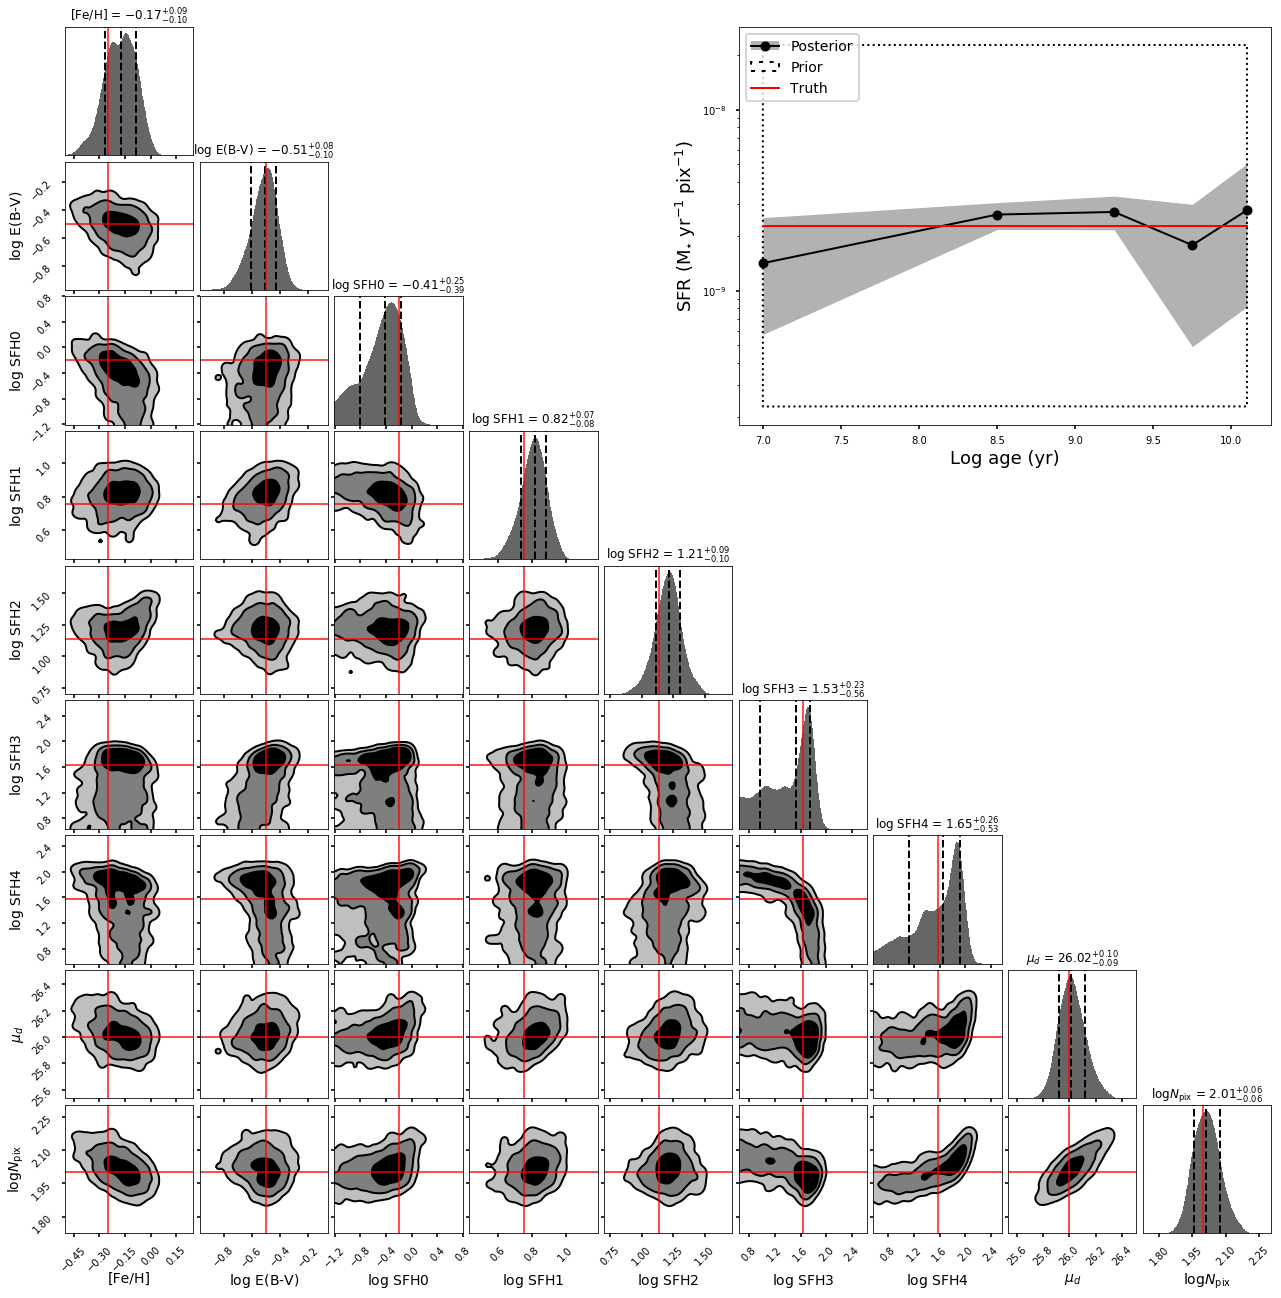

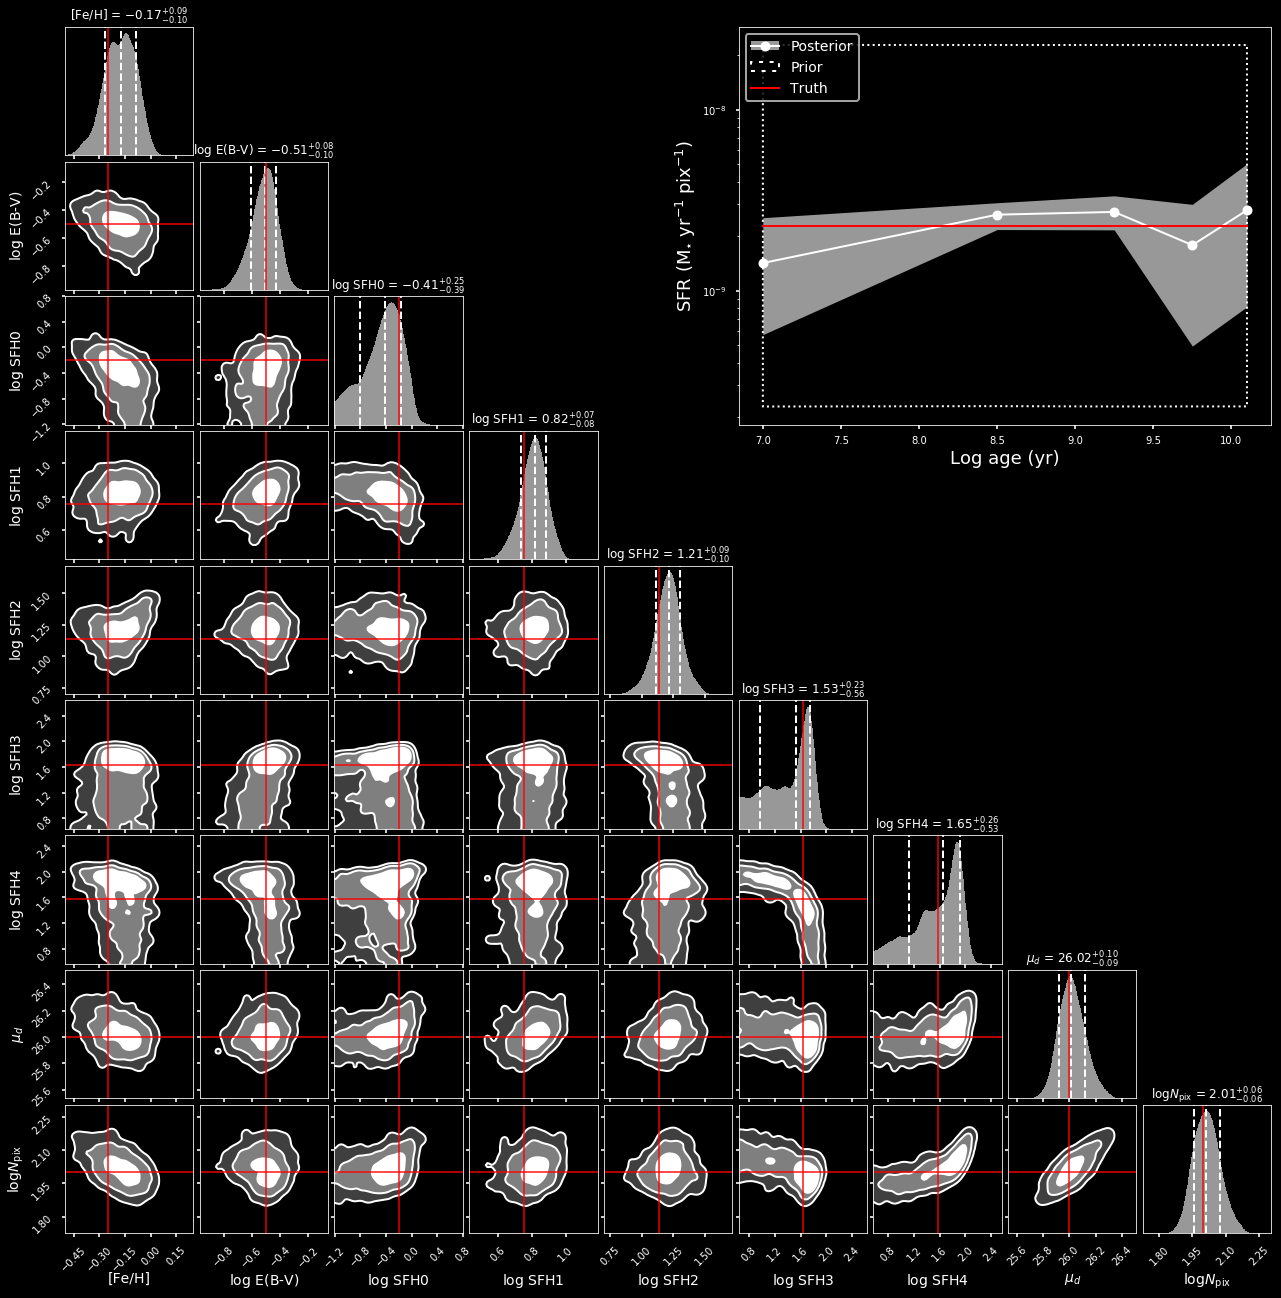

In [18]:
%%savefig_dark_light paper1/NonParam_Corner_const.pdf
r = res['mock_50']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=18)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=18)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_tau.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-

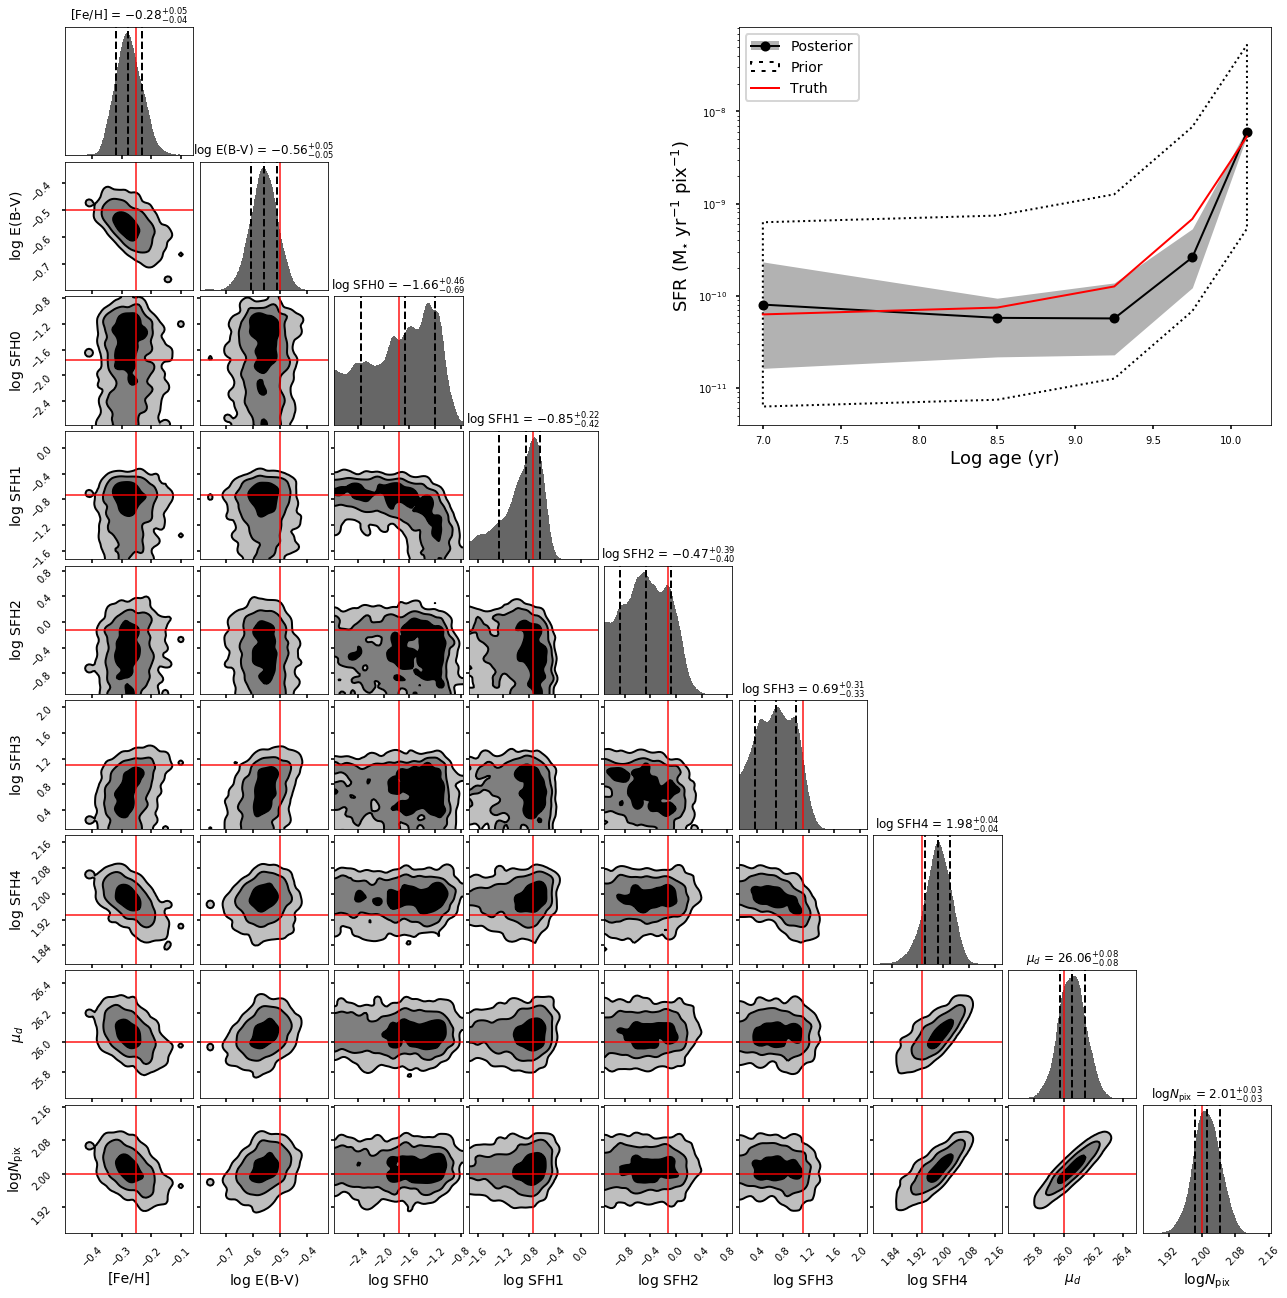

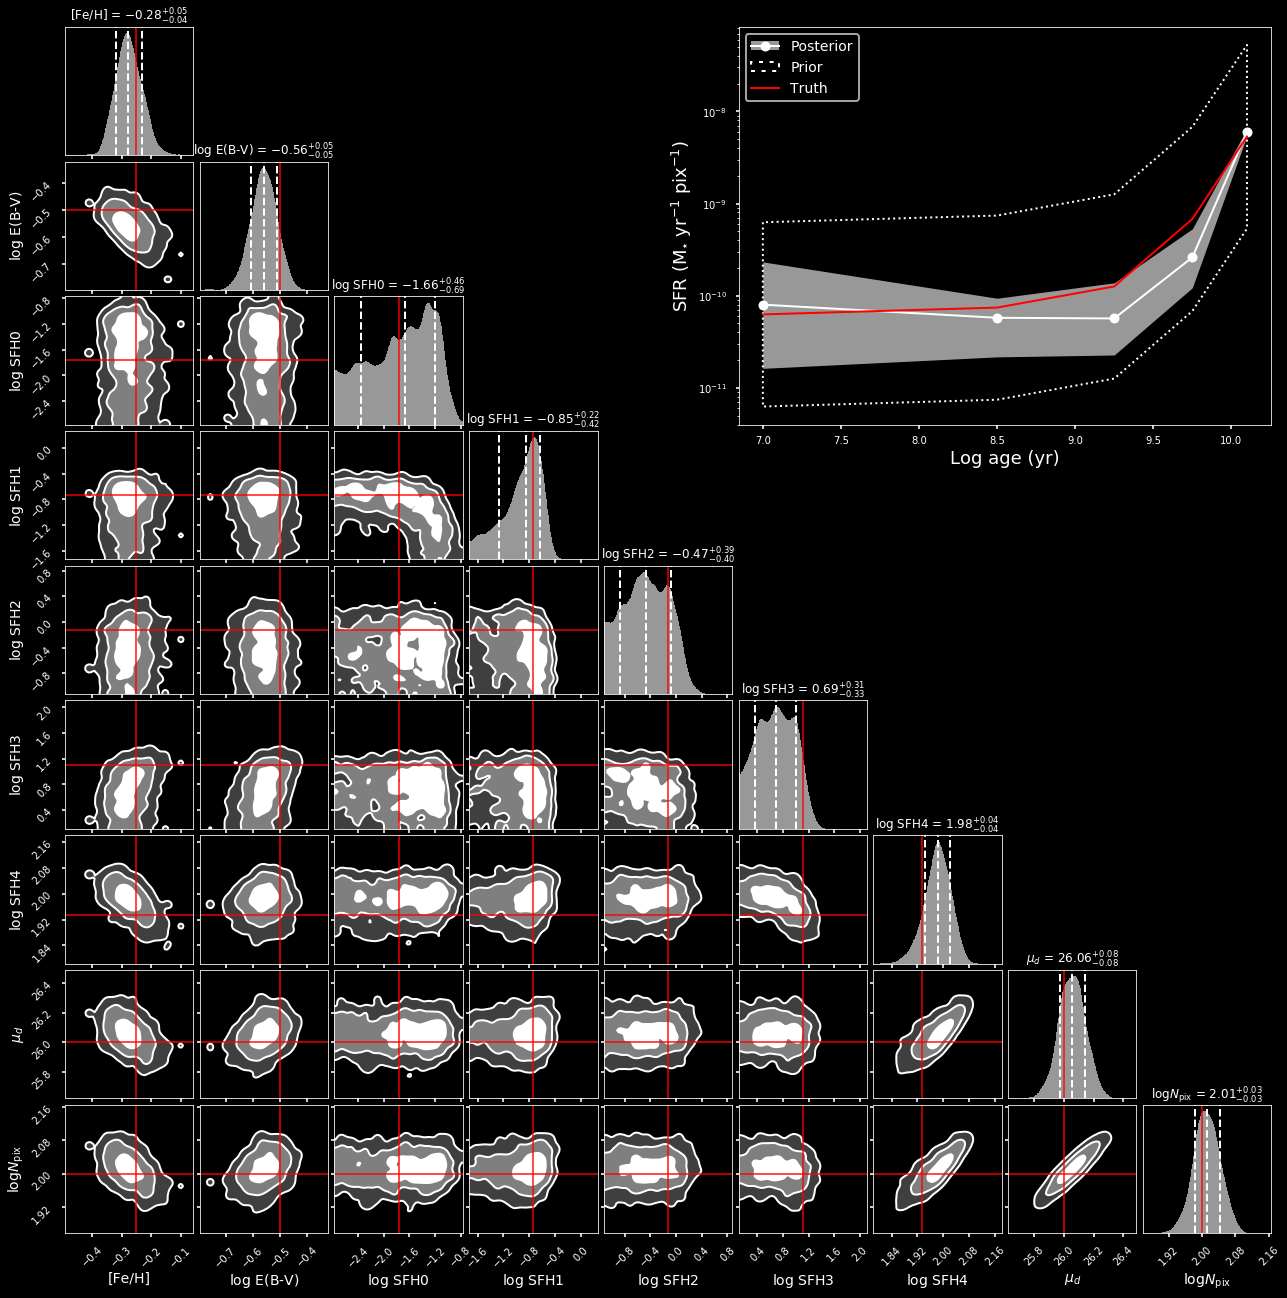

In [19]:
%%savefig_dark_light paper1/NonParam_Corner_tau.pdf
r = res['mock_8']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=18)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=18)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_const_3.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-leg

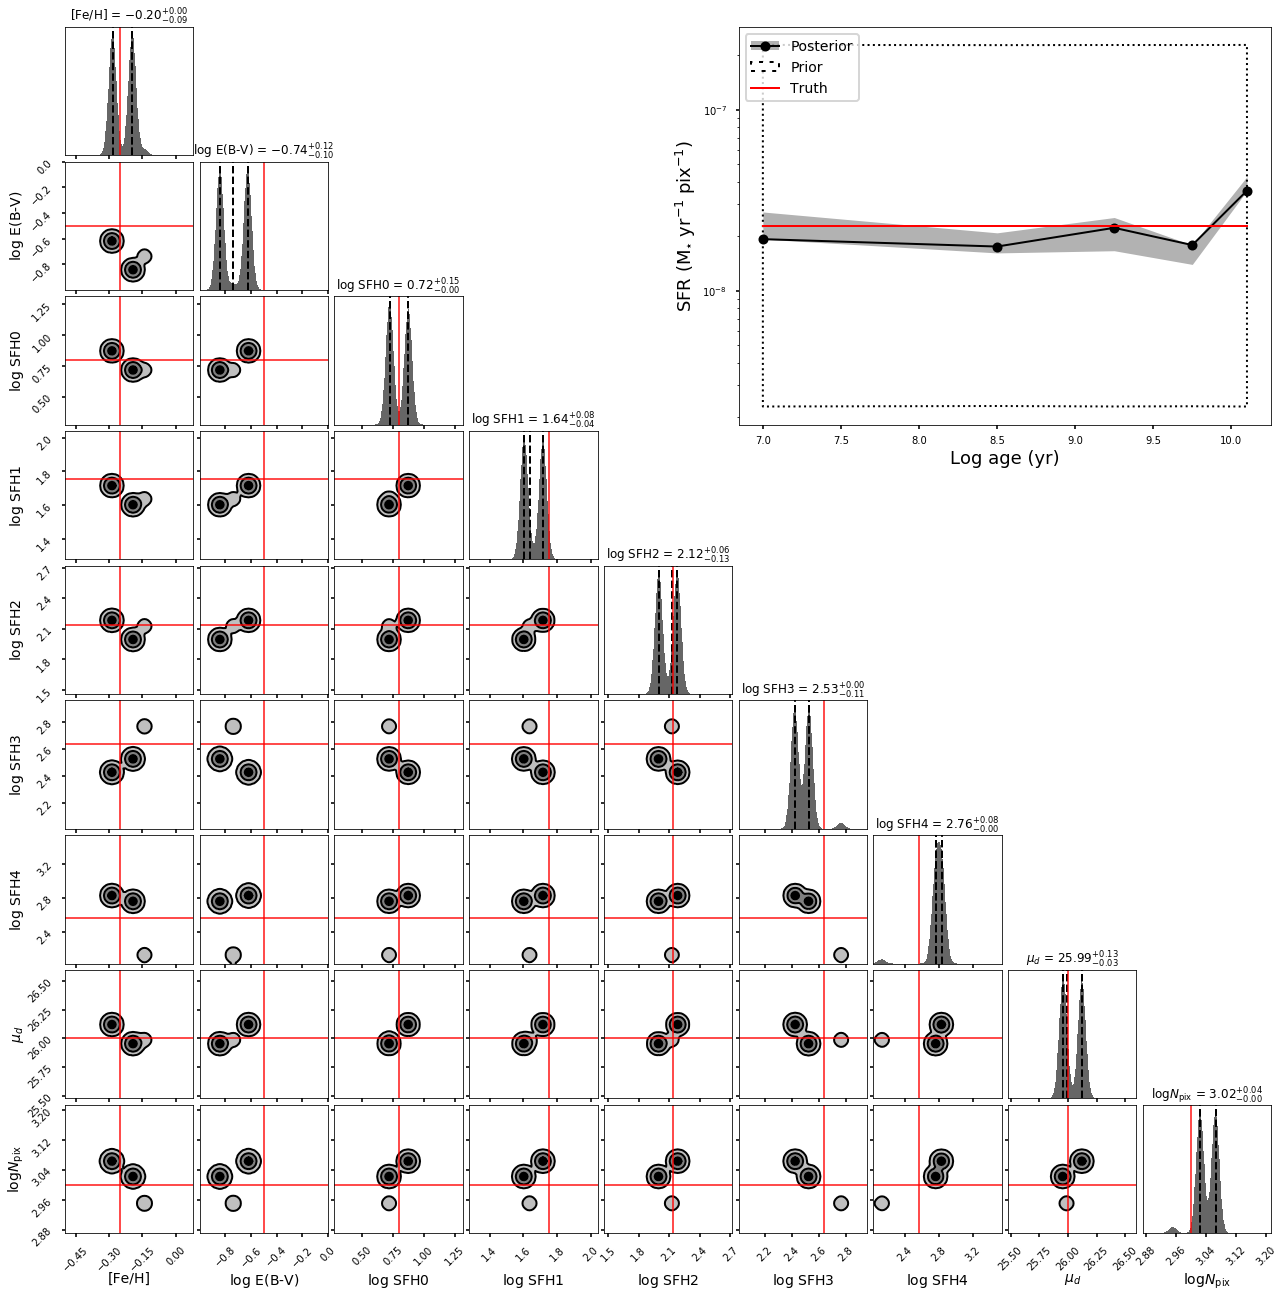

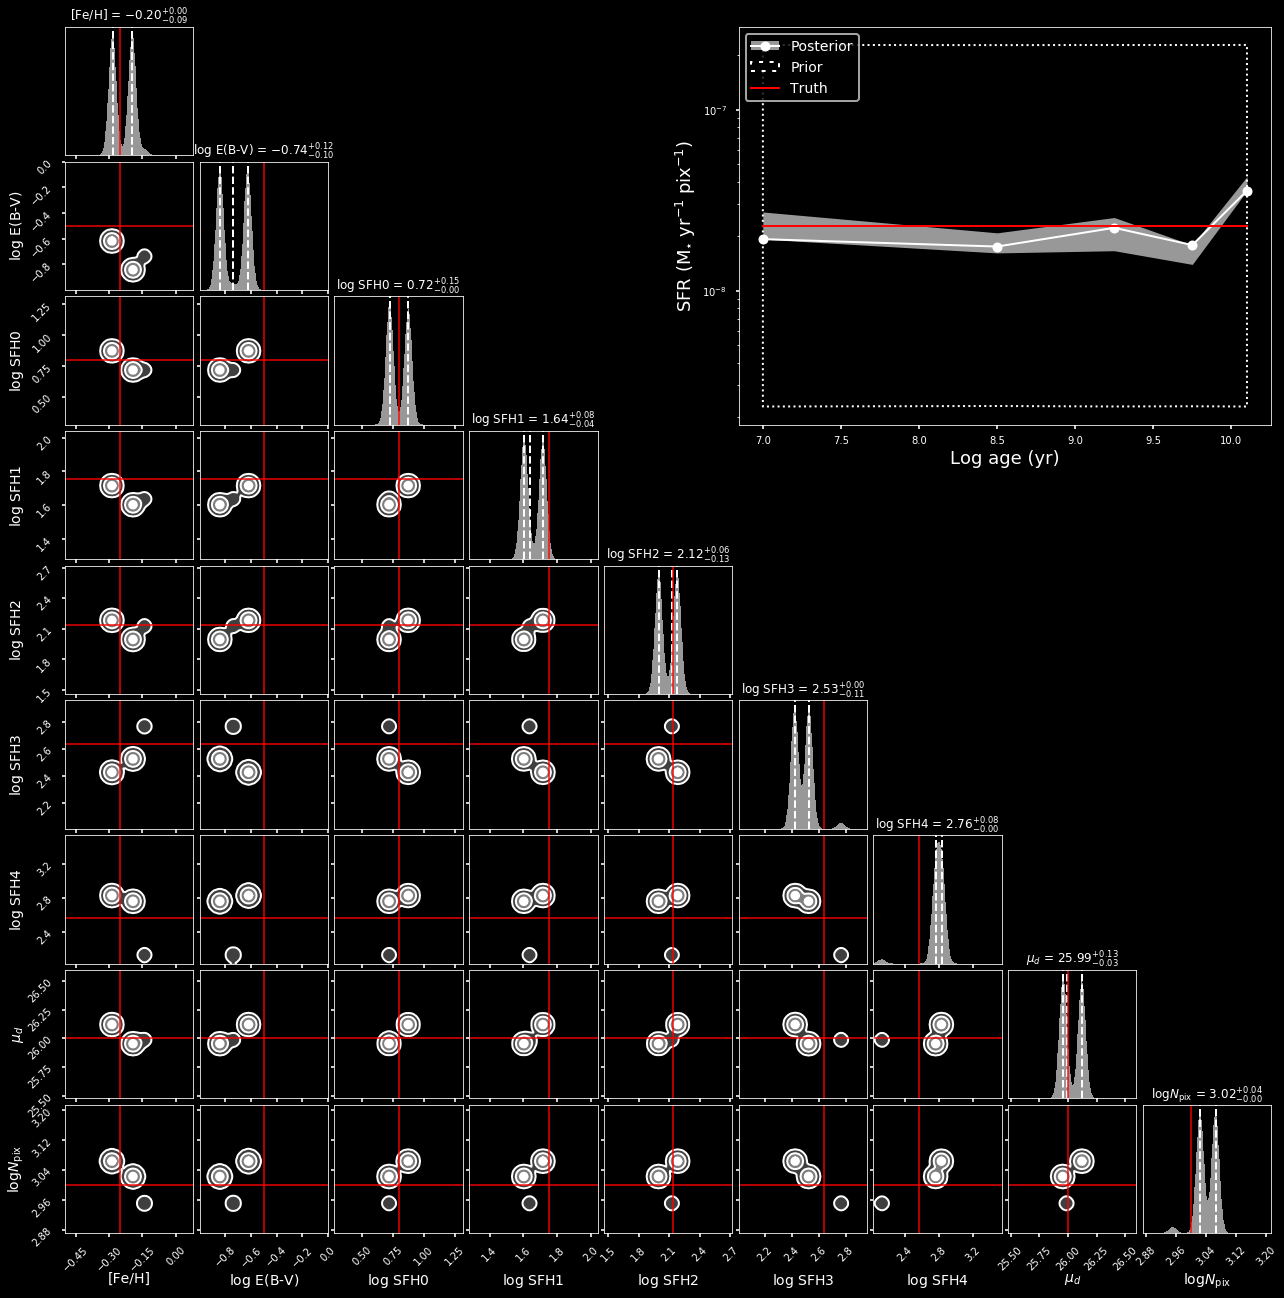

In [20]:
%%savefig_dark_light paper1/NonParam_Corner_const_3.pdf
r = res['mock_51']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig,  all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=18)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=18)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_tau_3.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legen

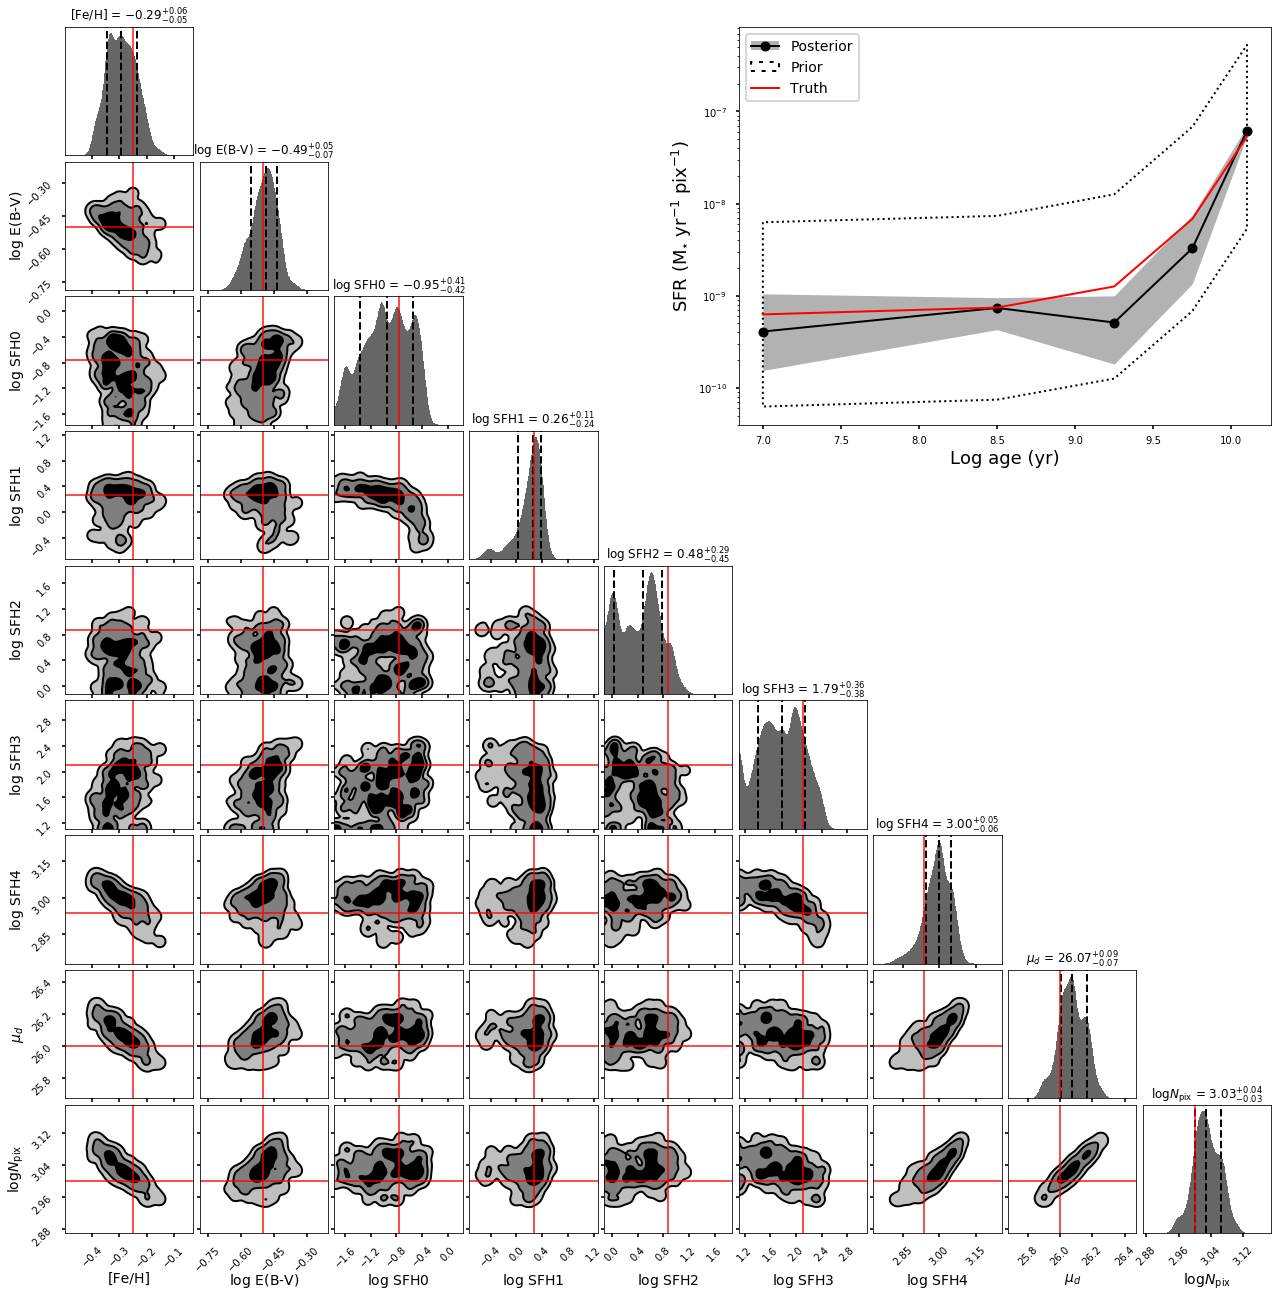

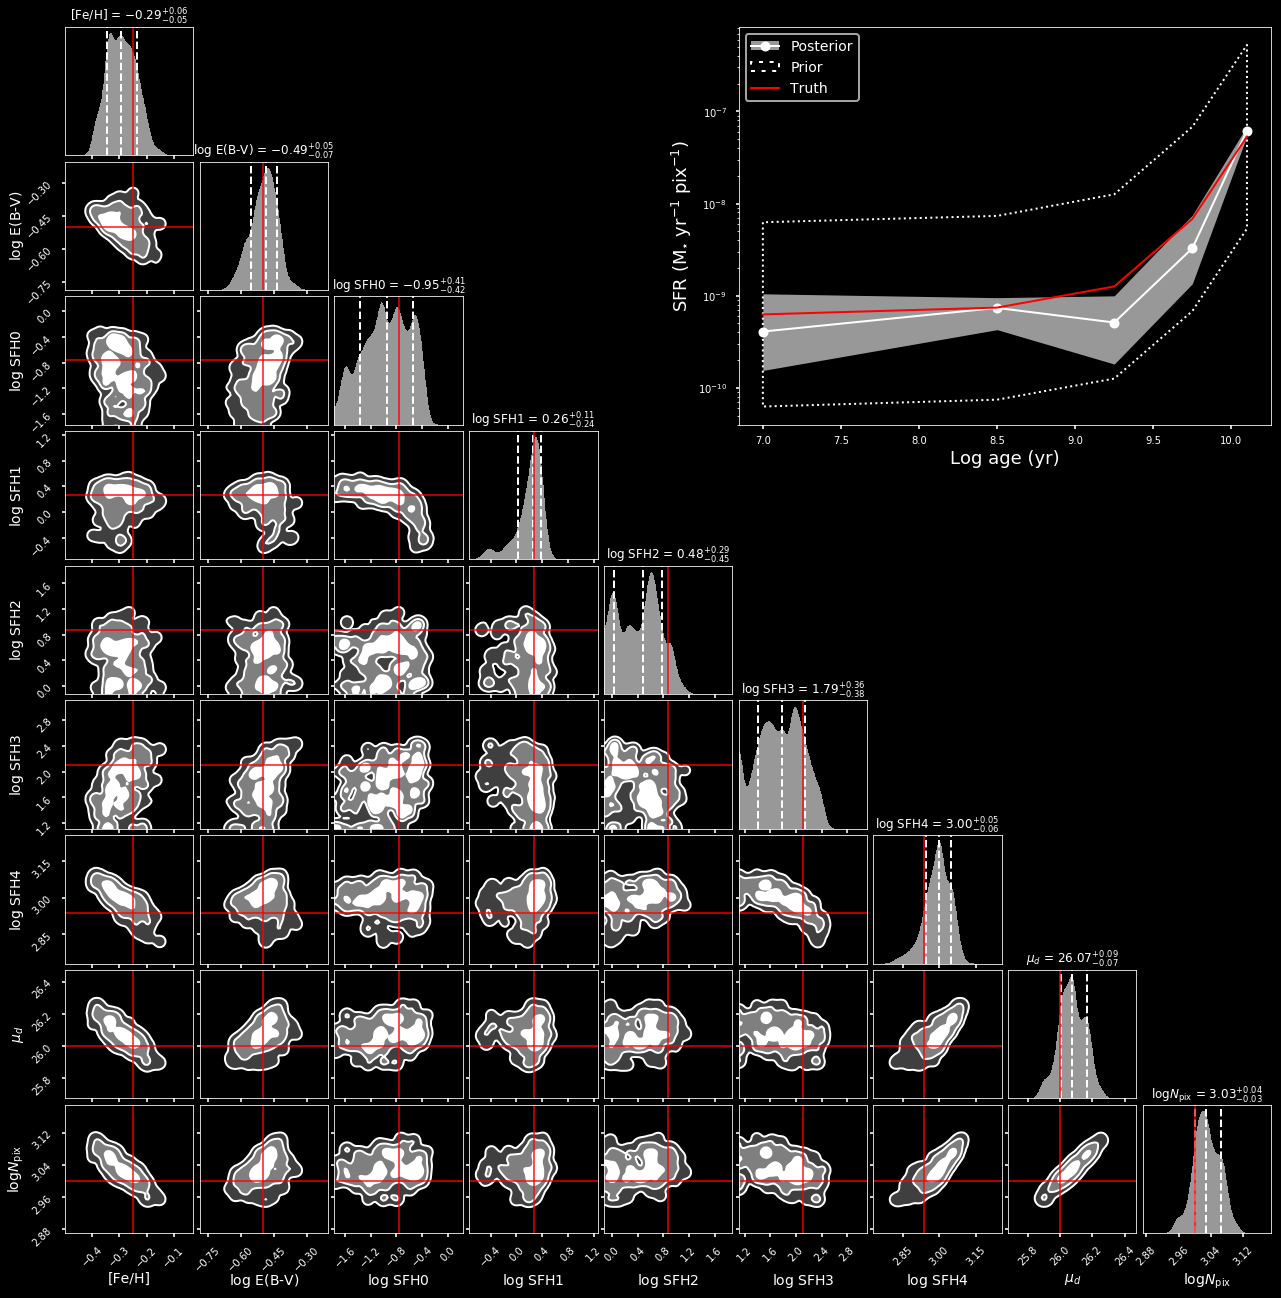

In [21]:
%%savefig_dark_light paper1/NonParam_Corner_tau_3.pdf
r = res['mock_46']
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=18)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=18)

# New Figure

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


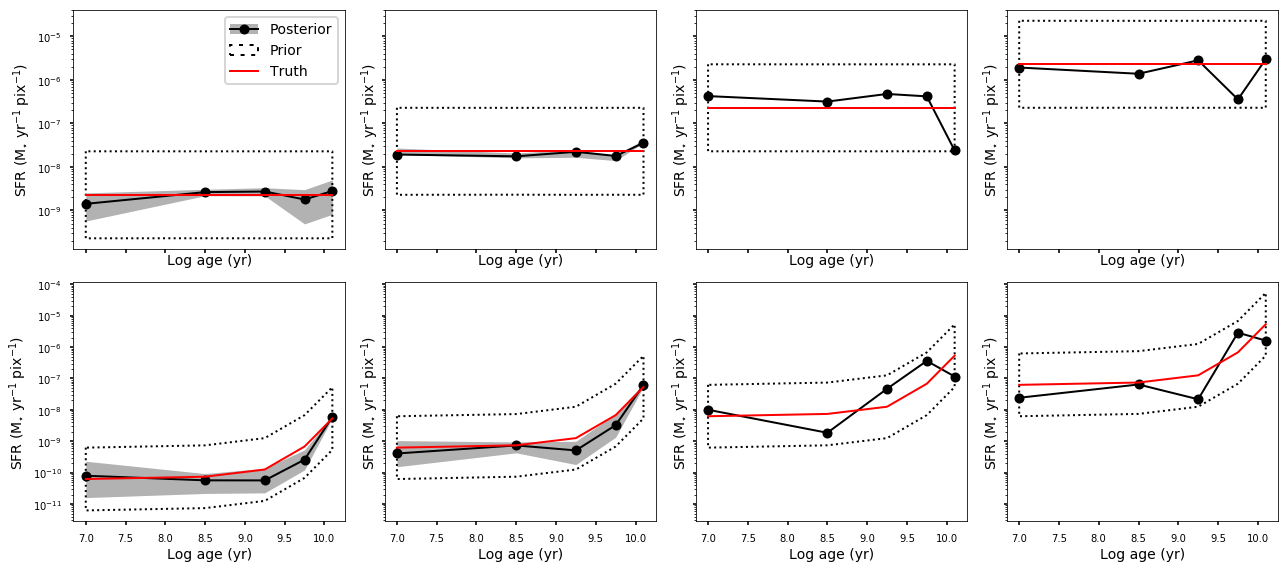

In [76]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18, 8), sharey='row', sharex=True)
for a, k in zip(axes[0], ['mock_50', 'mock_51', 'mock_52', 'mock_53']):
    r = res[k]
    r.plot_sfr(ax=a, all_ages=False, max_logl=max_logls.loc[k].logl_mean, error_kwargs={'alpha': 0.})
for a, k in zip(axes[1], ['mock_8', 'mock_46', 'mock_47', 'mock_48']):
    r = res[k]
    r.plot_sfr(ax=a, all_ages=False, max_logl=max_logls.loc[k].logl_mean, error_kwargs={'alpha': 0.})
for i, a in enumerate(axes.flatten()):
    if i > 0:
        a.get_legend().remove()
plt.tight_layout()

# Figure 5

In [80]:
df_summary.loc['mock_27']

t_run            37.5917
t_step           2.71376
delta_logz    0.00174333
finished            True
logl_max        -128.157
Name: mock_27, dtype: object

In [81]:
df_summary.loc['mock_28']

t_run             46.4889
t_step            2.87911
delta_logz    0.000810885
finished             True
logl_max         -101.874
Name: mock_28, dtype: object

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


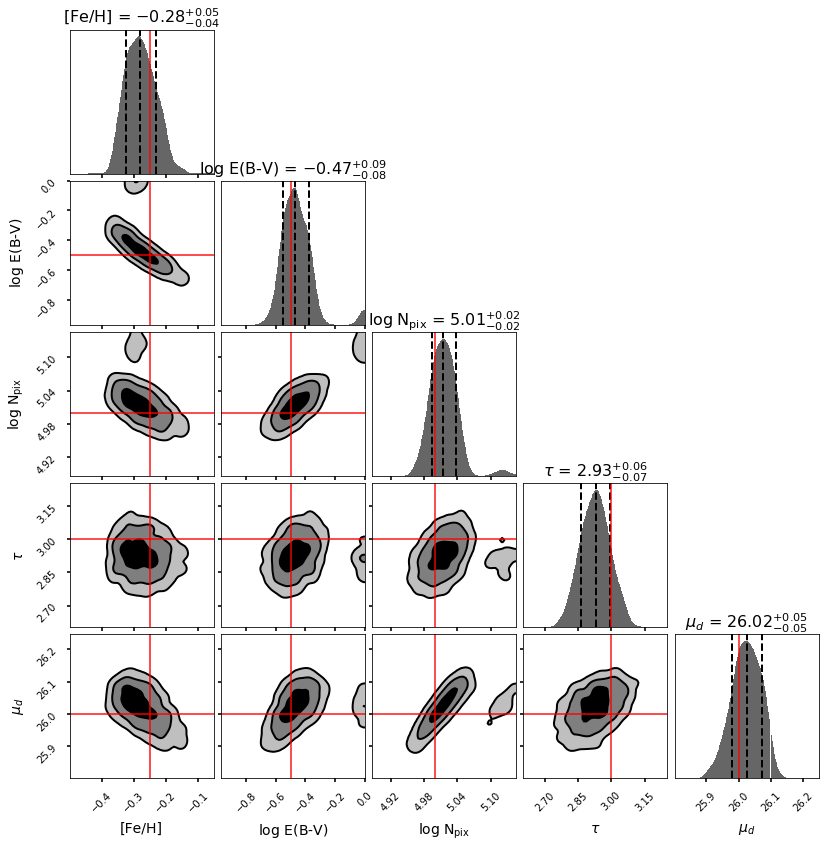

In [83]:
res['mock_27'].plot_corner(max_logl=df_summary.loc['mock_27'].logl_max);

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


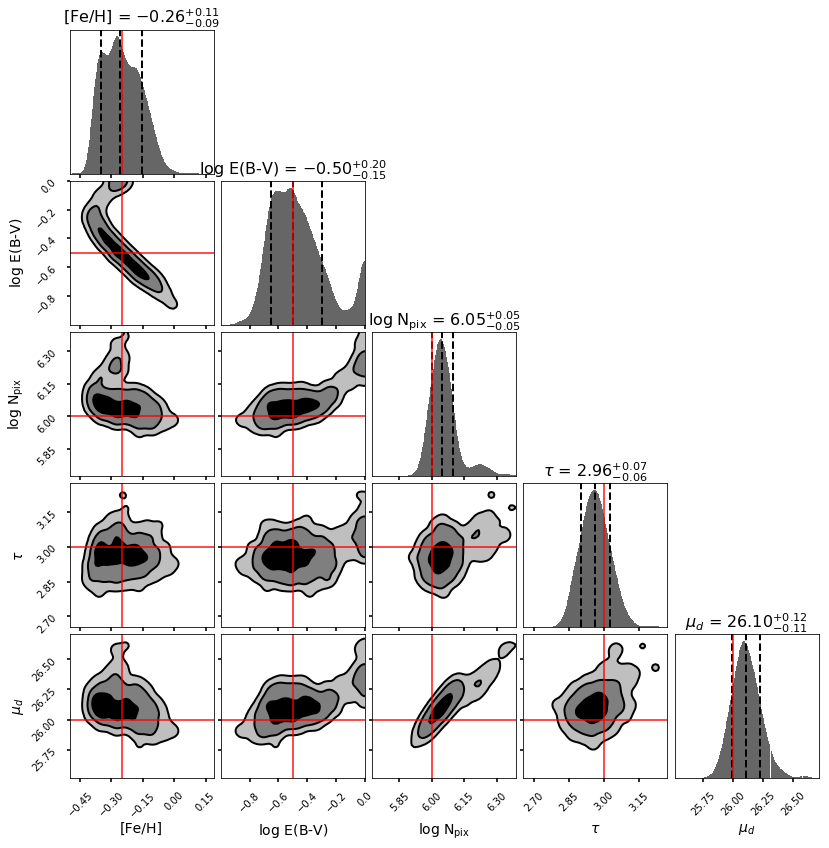

In [84]:
res['mock_28'].plot_corner(max_logl=df_summary.loc['mock_28'].logl_max);

In [25]:
res['mock_5'].stds

array([0.03343022, 0.0364375 , 0.02608541, 0.14888526, 0.07647428])

In [27]:
a, b = res['mock_5'].lower_upper
(b - a) / 2.

array([0.034895, 0.03634 , 0.02665 , 0.1525  , 0.0785  ])

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Npix.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Npix_dark.pdf


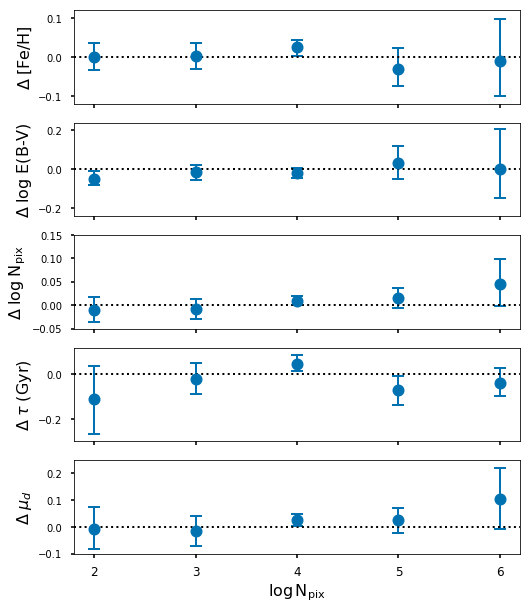

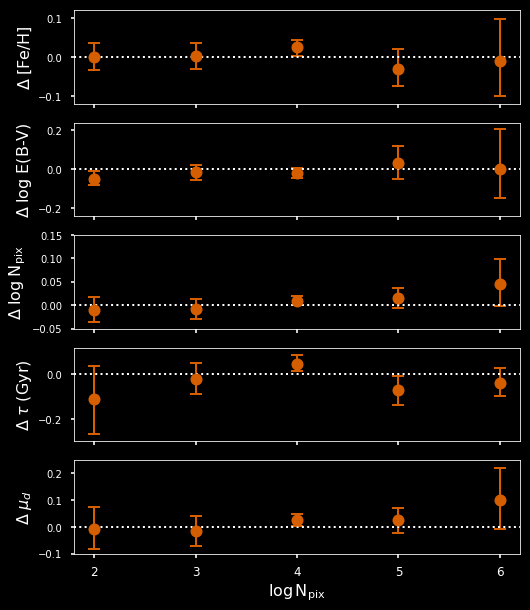

In [28]:
%%savefig_dark_light paper1/Npix.pdf
fig, axes = plt.subplots(nrows=5, figsize=(8,10), sharex=True)
keys = ['mock_5', 'mock_25', 'mock_26', 'mock_27', 'mock_28']
Npixs = np.arange(2, 7)
color = (dark_color if is_dark else light_color)
for i, k in enumerate(keys):
    r = res[k]
    r.plot_errorbars(axes, x=Npixs[i], offsets=r.true_params, color=color)

for i, ax in enumerate(axes):
    ax = axes[i]
    ax.axhline(y=0, ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)
    
axes[0].set_ylim([-0.12, 0.12])
axes[1].set_ylim([-.24, .24])
axes[2].set_ylim([-.05, .15])
axes[3].set_ylim([-.3, .12])
axes[4].set_ylim([-.1, 0.25])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$', fontsize=16)
axes[-1].set_xticks([2, 3, 4, 5, 6])
axes[-1].set_xticklabels([2, 3, 4, 5, 6], fontsize=12)

# Figure 6 - Variance

In [30]:
keys = ['mock_5', 'mock_34', 'mock_35', 'mock_36', 'mock_37', 'mock_38', 'mock_39', 'mock_40']
means = np.array([res[k].medians for k in keys])
stds = np.array([res[k].stds for k in keys])

Saving light figure as figures/paper1/Errors.pdf
Saving dark figure as figures_dark/paper1/Errors_dark.pdf


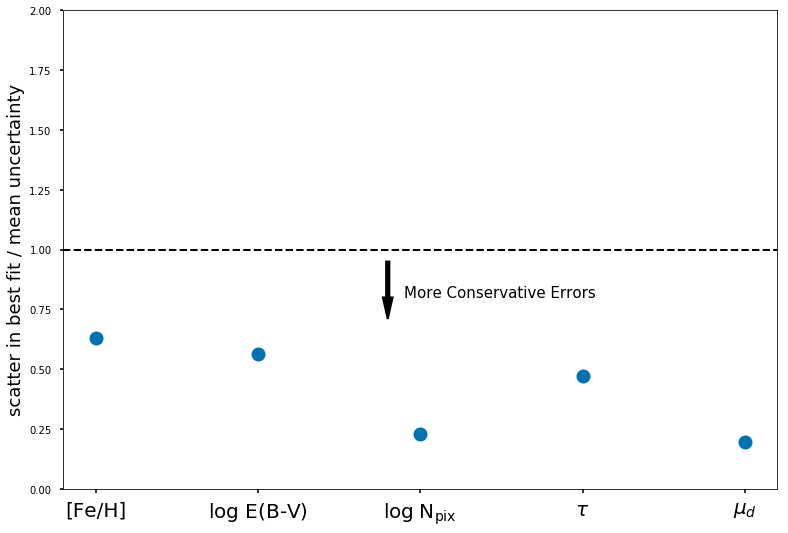

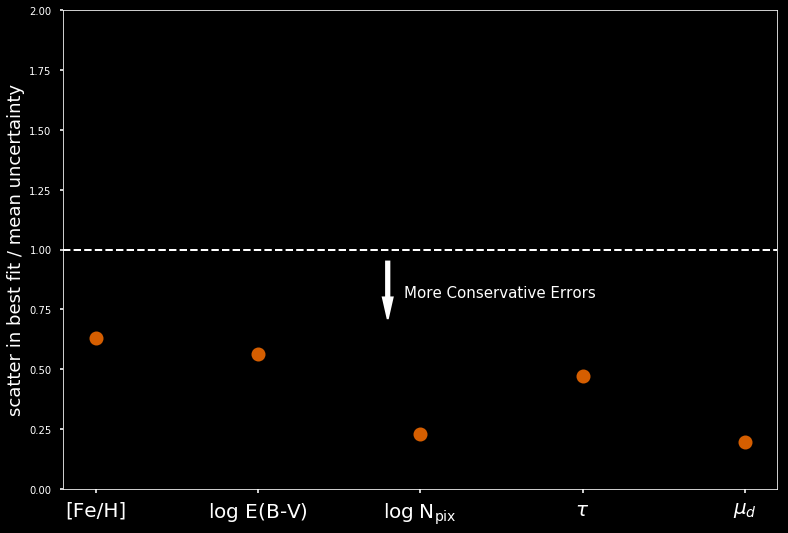

In [31]:
%%savefig_dark_light paper1/Errors.pdf
fig, ax = plt.subplots()
color = (dark_color if is_dark else light_color)
ax.plot(np.std(means, axis=0) / np.median(stds, axis=0), marker='o', ls='', color=color)
ax.arrow(1.8, 0.95, 0, -0.15, width=0.02, color=('w' if is_dark else'k'))
ax.text(1.9, 0.8, 'More Conservative Errors', fontsize=15)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(res['mock_5'].labels, fontsize=20)
ax.axhline(y=1, ls='--')
ax.set_ylim([0,2])
ax.set_ylabel(r'scatter in best fit / mean uncertainty', fontsize=18)

# Figure 7 - Other Violins

In [32]:
keys = [f'mock_{i}' for i in [33, 6, 10, 11, 30, 29]]
df_summary.loc[keys]

t_run     t_step    delta_logz  finished  logl_max
mock_33  143.219444   3.422164  7.854144e-04      True  -933.779
mock_6   166.177778   4.652631  9.770749e-06      True  -956.932
mock_10  160.130556   2.297746  3.383511e-06      True  -917.421
mock_11  144.097222  10.268617  4.818611e+01     False  -853.291
mock_30  133.366667   3.179287  1.307227e-03      True -2877.895
mock_29  137.808333   3.293961  5.469752e-07      True  -443.049

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/ModelChoices.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/ModelChoices_dark.pdf


<Figure size 1440x720 with 0 Axes>

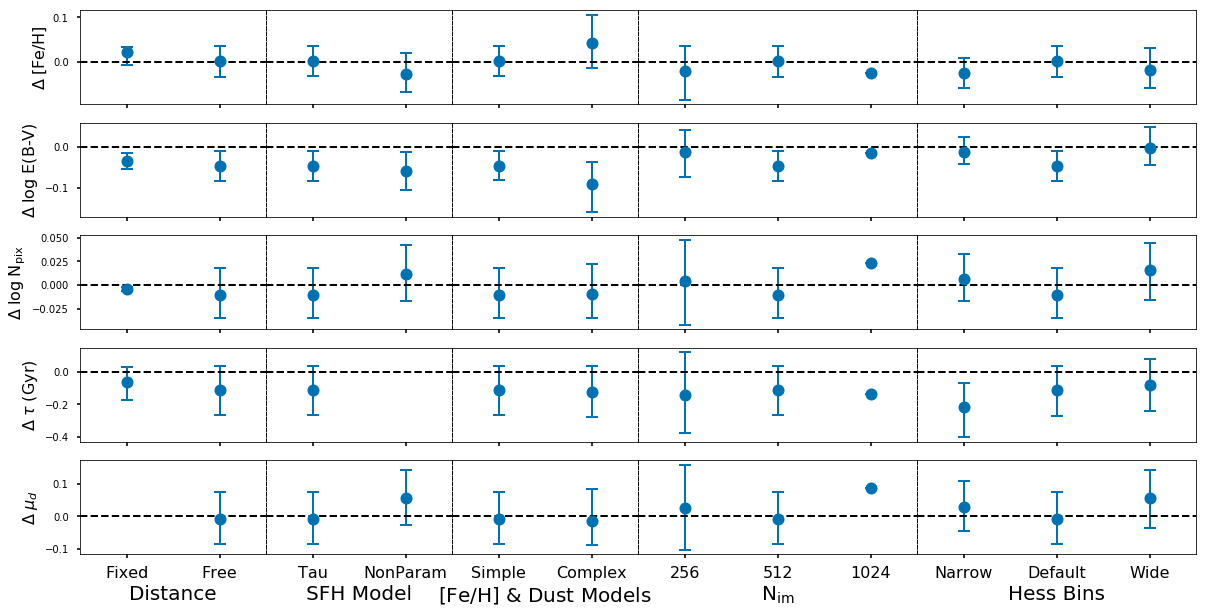

<Figure size 1440x720 with 0 Axes>

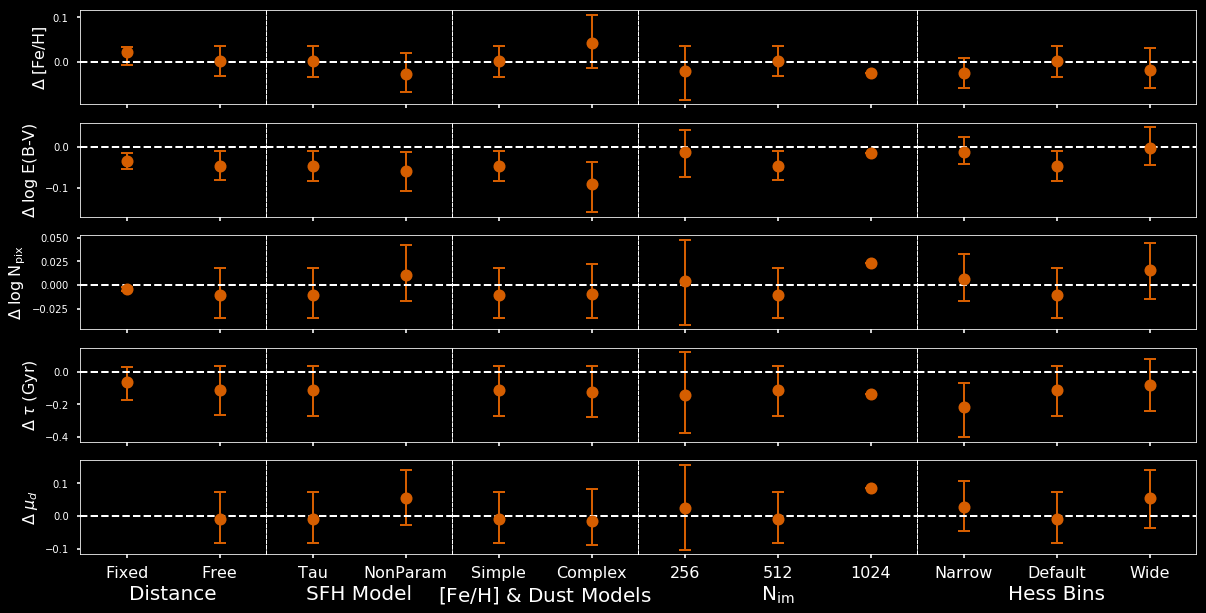

In [44]:
%%savefig_dark_light paper1/ModelChoices.pdf
fig = plt.figure(figsize=(20,10))
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 10), gridspec_kw={'width_ratios': [2,2,2,3,3], 'wspace': 0.}, sharex='col', sharey='row')
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        a = axes[i,j]
        if j > 0:
            a.spines['left'].set_linestyle('--')
            a.spines['left'].set_linewidth(1.)
            a.spines['left'].set_fill(False)
            a.yaxis.set_visible(False)
        if j < axes.shape[1]-1:
#             a.spines['right'].set_linestyle(':')
            a.spines['right'].set_visible(False)

color = (dark_color if is_dark else light_color) 

# Distance
r = res['mock_33']
r.plot_errorbars(axes=axes[:-1, 0], x=0, offsets=r.true_params, color=color)
r = res['mock_5']
r.plot_errorbars(axes=axes[:, 0], x=1, offsets=r.true_params, color=color)

# SFH
r = res['mock_5']
r.plot_errorbars(axes=axes[:, 1], x=0, offsets=r.true_params, color=color)
r = res['mock_8']
np_axes = [axes[0, 1], axes[1, 1]] + [None, None, None, None, None] + [axes[-1, 1], axes[2, 1]]
r.plot_errorbars(axes=np_axes, x=1, offsets=r.true_params, color=color)

# sig
r = res['mock_5']
r.plot_errorbars(axes=axes[:, 2], x=0, offsets=r.true_params, color=color)
r = res['mock_6']
np_axes = [axes[0, 2], None, axes[1, 2], None] + list(axes[2:, 2])
r.plot_errorbars(axes=np_axes, x=1, offsets=r.true_params, color=color)

# Nim
for i, k in enumerate(['mock_10', 'mock_5', 'mock_11']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 3], x=i, offsets=r.true_params, color=color)

# Hess Bins
for i, k in enumerate(['mock_30', 'mock_5', 'mock_29']):
    r = res[k]
    r.plot_errorbars(axes=axes[:, 4], x=i, offsets=r.true_params, color=color)
            
yl_size = 16
xl_size = 20
xt_size = 16
axes[-1, 0].set_xlabel('Distance', fontsize=xl_size)
axes[-1, 0].set_xticks([0, 1])
axes[-1, 0].set_xticklabels(['Fixed', 'Free'], fontsize=xt_size)
axes[-1, 0].set_xlim([-0.5, 1.5])

axes[-1, 1].set_xlabel('SFH Model', fontsize=xl_size)
axes[-1, 1].set_xticks([0, 1])
axes[-1, 1].set_xticklabels(['Tau', 'NonParam'], fontsize=xt_size)
axes[-1, 1].set_xlim([-0.5, 1.5])

axes[-1, 2].set_xlabel(r'$\mathrm{[Fe/H]}$ & Dust Models', fontsize=xl_size)
axes[-1, 2].set_xticks([0, 1])
axes[-1, 2].set_xticklabels(['Simple', 'Complex'], fontsize=xt_size)
axes[-1, 2].set_xlim([-0.5, 1.5])

axes[-1, 3].set_xlabel(r'$\mathrm{N_{im}}$', fontsize=xl_size)
axes[-1, 3].set_xticks([0, 1, 2])
axes[-1, 3].set_xticklabels([256, 512, 1024], fontsize=xt_size)
axes[-1, 3].set_xlim([-0.5, 2.5])

axes[-1, 4].set_xlabel('Hess Bins', fontsize=xl_size)
axes[-1, 4].set_xticks([0, 1, 2])
axes[-1, 4].set_xticklabels(['Narrow', 'Default', 'Wide'], fontsize=xt_size)
axes[-1, 4].set_xlim([-0.5, 2.5])

for ax in axes.flatten():
    ax.axhline(y=0, ls='--')
for i in range(5):
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    axes[i, 0].set_ylabel(ylabel, fontsize=yl_size)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Model_Mismatch_arrow.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Model_Mismatch_arrow_dark.pdf


<Figure size 864x720 with 0 Axes>

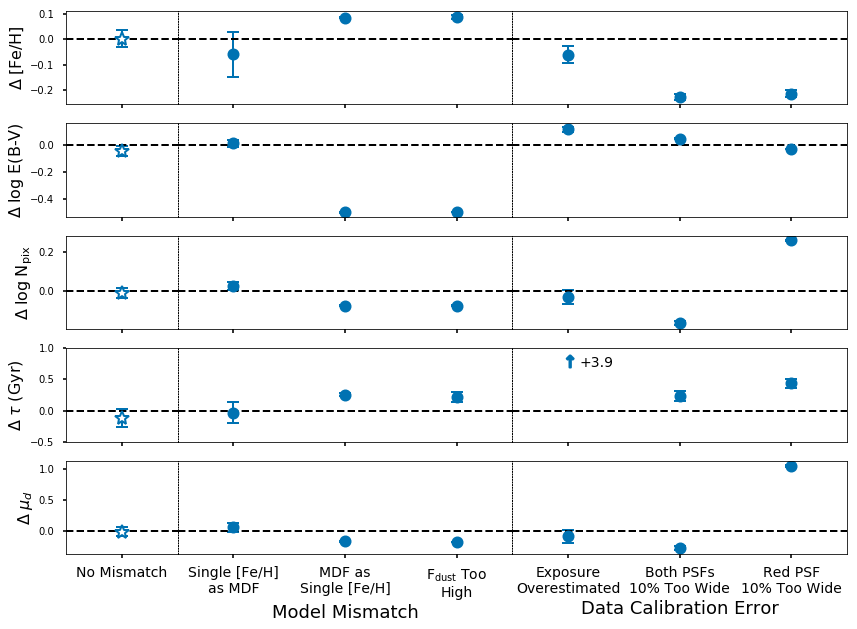

<Figure size 864x720 with 0 Axes>

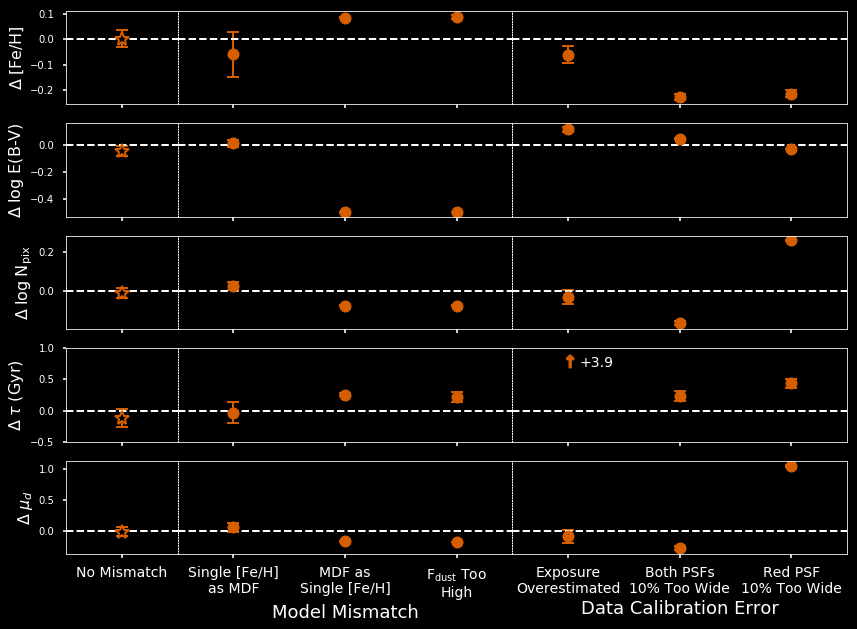

In [101]:
%%savefig_dark_light paper1/Model_Mismatch_arrow.pdf
fig = plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 10), gridspec_kw={'width_ratios': [1,3,3], 'wspace': 0.}, sharex='col', sharey='row')
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        a = axes[i,j]
        if j > 0:
            a.spines['left'].set_linestyle(':')
            a.spines['left'].set_linewidth(1.)
            a.spines['left'].set_fill(False)
            a.yaxis.set_visible(False)
        if j < axes.shape[1]-1:
#             a.spines['right'].set_linestyle(':')
            a.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.)

color = (dark_color if is_dark else light_color) 
face = ('k' if is_dark else 'w')

keys = ['mock_5']
means = [list(res[k].means(max_logl=max_logls.loc[k].logl_mean)-res[k].true_params) for k in keys]
stds = [list(res[k].stds(max_logl=max_logls.loc[k].logl_mean)) for k in keys]
for i in range(5):
    for j in range(len(means)):
        if means[j][i] is not None:
            axes[i, 0].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='*', ms=15,
                       ls='', capsize=6, color=color, mfc=face)

# Model Complexity
keys = ['mismatch_1', 'mismatch_2', 'mismatch_5']
means = [list(res[k].means(max_logl=max_logls.loc[k].logl_mean)-res[k].true_params) for k in keys]
stds = [list(res[k].stds(max_logl=max_logls.loc[k].logl_mean)) for k in keys]
for i in range(5):
    for j in range(len(means)):
        if means[j][i] is not None:
            axes[i, 1].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=6, color=color)

# Model Complexity
keys = ['mismatch_7', 'mismatch_8', 'mismatch_9']
means = [list(res[k].means(max_logl=max_logls.loc[k].logl_mean)-res[k].true_params) for k in keys]
stds = [list(res[k].stds(max_logl=max_logls.loc[k].logl_mean)) for k in keys]
for i in range(5):
    for j in range(len(means)):
        if means[j][i] is not None:
            axes[i, 2].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=6, color=color)
for i in range(5):
    ax = axes[i, 0]
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)

for ax in axes.flatten():
    ax.axhline(y=0, ls='--')

xts = 14
ax = axes[-1, 0]
ax.set_xticks([0])
ax.set_xlabel('')
ax.set_xticklabels(['No Mismatch'], fontsize=xts)
ax.set_xlim([-0.5, 0.5])

ax = axes[-1, 1]
ax.set_xticks([0, 1, 2])
ax.set_xlabel('Model Mismatch', fontsize=18)
ax.set_xticklabels(['Single [Fe/H]\nFit as MDF',
                    'MDF Fit as\nSingle [Fe/H]',
                    r'$\mathrm{F_{dust}}$' + '\nToo High'], fontsize=xts)
ax.set_xlim([-0.5, 2.5])

ax = axes[-1, 2]
ax.set_xticks([0, 1, 2])
ax.set_xlabel('Data Calibration Error', fontsize=18)
ax.set_xticklabels(['Exposure\nOverestimated',
                    'Both PSFs\n10% Too Wide',
                    'Red PSF\n10% Too Wide'], fontsize=xts)
ax.set_xlim([-0.5, 2.5])

axes[3, 0].set_ylim([-.5, 1])
axes[3, 2].plot(0, 0.8, marker=r'$\uparrow$', color=color)
axes[3, 2].text(0.1, 0.7, '+3.9', fontsize=14)

# Figure 7

In [102]:
r = res['mock_5']

In [103]:
r.df.logl.max()

-868.35

In [104]:
max_logls.loc['mock_5']

logl_mean   -984.609
logl_true   -995.698
Name: mock_5, dtype: float64

In [105]:
logls = np.linspace(r.df.logl.max(), -1050., 100)
means = np.array([r.means(max_logl=l) for l in tqdm(logls)])
stds = np.array([r.stds(max_logl=l) for l in tqdm(logls)])

100%|██████████| 100/100 [00:09<00:00, 10.84it/s]


Saving light figure as figures/paper1/Likelihood_Ceiling.pdf
Saving dark figure as figures_dark/paper1/Likelihood_Ceiling_dark.pdf


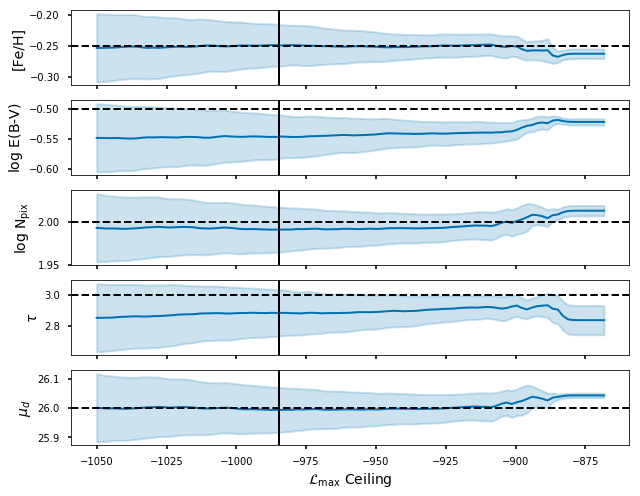

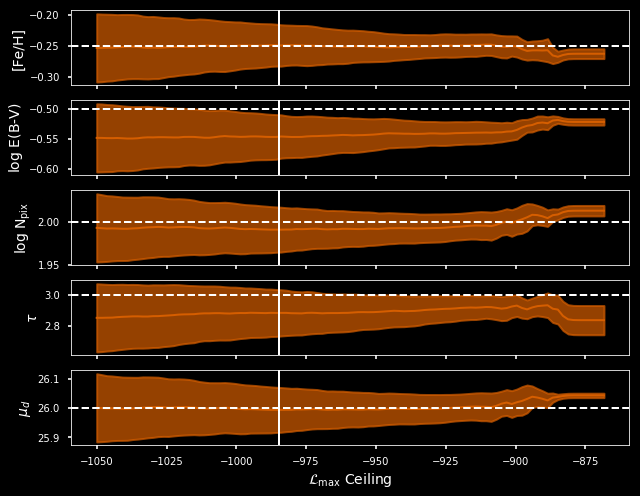

In [107]:
%%savefig_dark_light paper1/Likelihood_Ceiling.pdf
fig, axes = plt.subplots(nrows=5, figsize=(10, 8), sharex=True)
for i in range(5):
    axes[i].plot(logls, means[:, i], color=(dark_color if is_dark else light_color))
    axes[i].fill_between(logls, y1=means[:,i]+stds[:,i], y2=means[:,i]-stds[:,i], alpha=(0.7 if is_dark else 0.2), zorder=-1, color=(dark_color if is_dark else light_color))
    axes[i].axvline(x=max_logls.loc['mock_5'].logl_mean, ls='-')
    axes[i].axhline(y=r.true_params[i], ls='--')
    axes[i].set_ylabel(r.labels[i])
axes[-1].set_xlabel(r'$\mathcal{L}_\mathrm{max}$ Ceiling')
# plt.savefig('figures/paper1/Likelihood_Cutoffs.pdf')

In [38]:
colors = color_palette('colorblind', 10).as_hex()

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


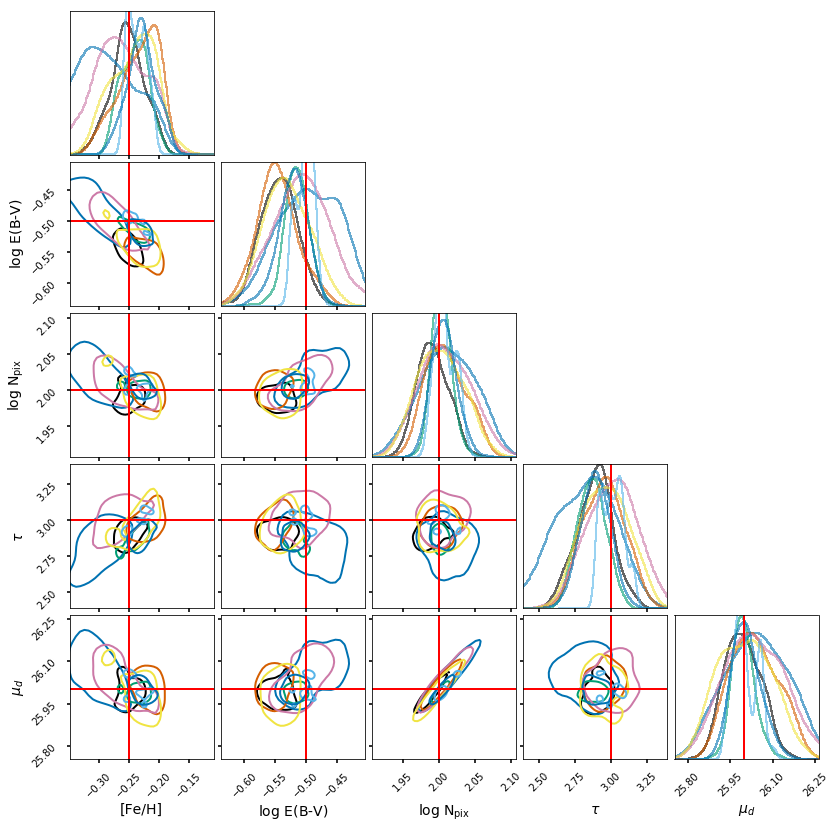

In [39]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(34, 41)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


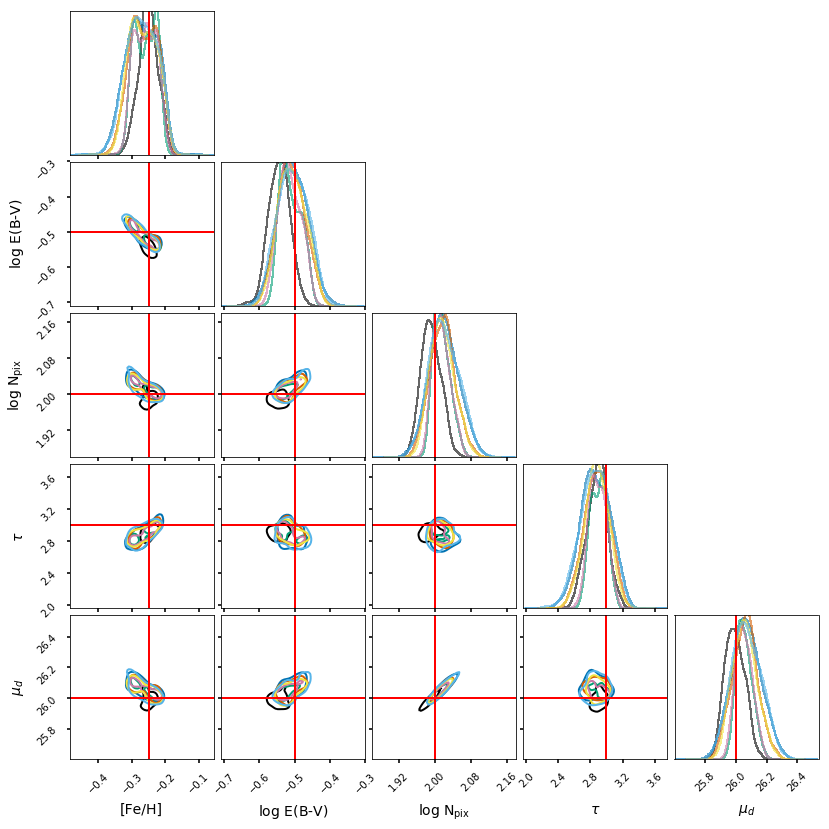

In [45]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(18, 24)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)